<a href="https://colab.research.google.com/github/ol287/ECM3428/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

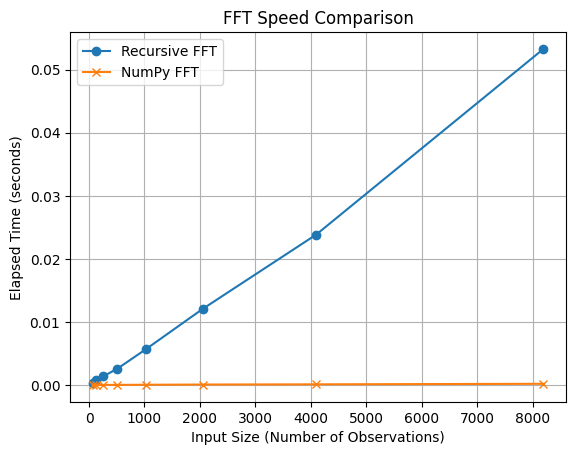

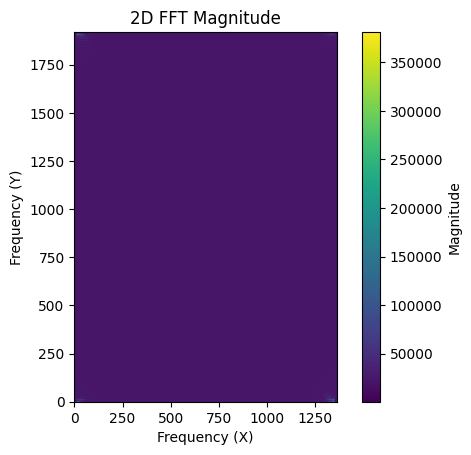

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import csv

# Task 1: Implement Recursive FFT
def recursive_fft(x):
    """
    Perform the recursive Fast Fourier Transform on a vector x.
    :param x: Input vector, length must be a power of 2
    :return: Transformed frequency vector
    """
    N = len(x)
    if N == 1:
        return x  # Base case: single element
    # Calculate the twiddle factors
    W_N = np.exp(-2j * np.pi / N)
    W = 1
    # Split the array into even and odd indices
    x_even = recursive_fft(x[::2])
    x_odd = recursive_fft(x[1::2])
    # Initialize the output array
    y = [0] * N
    for k in range(N // 2):
        y[k] = x_even[k] + W * x_odd[k]
        y[k + N // 2] = x_even[k] - W * x_odd[k]
        W *= W_N  # Update twiddle factor
    return y

# Task 1: Compare Recursive FFT with NumPy's FFT
def compare_fft_speed():
    """
    Compare the speed of the implemented recursive FFT with NumPy's FFT
    """
    sizes = [2**i for i in range(6, 14)]  # Power of 2 sizes from 64 to 8192
    recursive_times = []
    numpy_times = []

    for size in sizes:
        # Generate a random vector
        x = np.random.rand(size)

        # Measure Recursive FFT time
        start_time = time.time()
        recursive_fft(x)
        recursive_times.append(time.time() - start_time)

        # Measure NumPy FFT time
        start_time = time.time()
        np.fft.fft(x)
        numpy_times.append(time.time() - start_time)

    # Plot the comparison
    plt.figure()
    plt.plot(sizes, recursive_times, label='Recursive FFT', marker='o')
    plt.plot(sizes, numpy_times, label='NumPy FFT', marker='x')
    plt.xlabel('Input Size (Number of Observations)')
    plt.ylabel('Elapsed Time (seconds)')
    plt.title('FFT Speed Comparison')
    plt.legend()
    plt.grid()
    plt.show()

# Task 2: Perform 2D FFT
def perform_2d_fft(file_path):
    """
    Perform a 2D FFT on a given CSV file representing wave heights.
    :param file_path: Path to the CSV file
    """
    try:
        # Load the CSV data
        with open(file_path, 'r') as f:
            reader = csv.reader(f)
            data = []
            max_length = 0

            # Process each row and track the maximum row length
            for row in reader:
                cleaned_row = []
                for value in row:
                    try:
                        cleaned_row.append(float(value))
                    except ValueError:
                        # Replace invalid values with 0
                        cleaned_row.append(0.0)
                data.append(cleaned_row)
                max_length = max(max_length, len(cleaned_row))

            # Ensure all rows are of the same length by padding with 0s
            for i in range(len(data)):
                if len(data[i]) < max_length:
                    data[i] += [0.0] * (max_length - len(data[i]))

            # Convert to a NumPy array
            data = np.array(data)

        # Perform 1D FFT on each row
        row_fft = np.fft.fft(data, axis=1)

        # Perform 1D FFT on each column of the row_fft result
        full_fft = np.fft.fft(row_fft, axis=0)

        # Plot the magnitude of the 2D FFT
        plt.figure()
        plt.imshow(np.abs(full_fft), cmap='viridis', extent=(0, data.shape[1], 0, data.shape[0]))
        plt.colorbar(label='Magnitude')
        plt.title('2D FFT Magnitude')
        plt.xlabel('Frequency (X)')
        plt.ylabel('Frequency (Y)')
        plt.show()
    except Exception as e:
        print(f"An error occurred while processing the 2D FFT: {e}")

# Main Execution
if __name__ == "__main__":
    # Task 1: Compare FFT speed
    compare_fft_speed()

    # Task 2: Perform 2D FFT
    perform_2d_fft('/waveRadar.csv')